In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#matplotib notebook

Considera un conjunto de observaciones agrupadas en $K$ clases:

\begin{matrix}
\hline
x_{11} &  x_{12} & \ldots & x_{1d} & \color{blue}{y_1} \\
x_{21} & x_{22} & \ldots & x_{1d} & \color{blue}{y_2} \\
\vdots & \vdots & \vdots & \vdots & \vdots\\   
x_{N1} & x_{N2} & \ldots & x_{Nd} & \color{blue}{y_N} \\
\hline
\end{matrix}

siendo $y_i \in \{l_1, l_2, \ldots, l_K\}$

# Modelo generativo

Considera además que las observaciones de cada clase provienen de una distribución normal multivariada:

$$P(y_i \; |\; x) = \frac{\pi_i}{(2\pi)^{d/2}|\Sigma|} e^{-\frac{1}{2}(x-\mu_i)^{T}\Sigma^{-1}(x-\mu_i)}$$

Siendo $\mu_i$ el centro de cada normal, $\Sigma$ la matriz de covarianza (que por ahora suponemos la misma para todas las clases) y $\pi_i$ la probabilidad de ocurrencia de la clase $i-$ésima. 

Un ejemplo, para dos clases, se muestra en la siguiente celda.

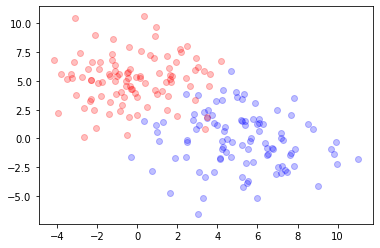

In [2]:
#medias de clase
m1 = np.array([5,0])
m2 = np.array([0,5])

#matriz de covarianza, común y diagonal
s = 5
S = s*np.eye(2)
#S = np.array([[1,0],[0,1]])

#número de observaciones
n = 100

#genera los datos
X1 = np.random.multivariate_normal(m1, S, n)
X2 = np.random.multivariate_normal(m2, S, n)

plt.plot(X1[:,0],X1[:,1],'bo', alpha=0.25)
plt.plot(X2[:,0],X2[:,1],'ro', alpha=0.25)
plt.show()

In [3]:
#guardamos las observaciones en un dataframe de Pandas
X = np.vstack((X1,X2))
df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = 1
df.iloc[:n,df.columns.get_loc('y')] = 2
df = df.sample(frac=1) #reordena las filas
df = df.reset_index(drop=True)
df.head()

,x1,x2,y
0,-0.425590,7.994537,1
1,4.260919,4.220391,2
2,3.555089,2.438795,2
3,7.633648,-1.457318,2
4,-0.504814,5.732889,1


## Clasificación

Una vez que obtenemos el vector de características de una nueva observación, $x$, es muy fácil identificar a qué clase asignarla si conocemos los parámetros de la distribución de cada clase ($\mu_i$ y $\Sigma$): **simplemente identificando la clase con la mayor probabilidad**:

$$\color{blue}{y = l_k = \arg\max_{i} P(Y=l_i \;|\; X=x) = \arg\max_{i}\frac{\pi_i}{(2\pi)^{d/2}|\Sigma|}e^{-\frac{1}{2}(x-\mu_i)^{T}\Sigma^{-1}(x-\mu_i)}}$$ 

Tomando como referencia los datos que generamos más arriba, imagina que observas el vector de características $x = [1,\;3]$ ¿a cuál clase se debe asignar? (considera que $\pi_1 = \pi_2 = \frac{1}{2}$)

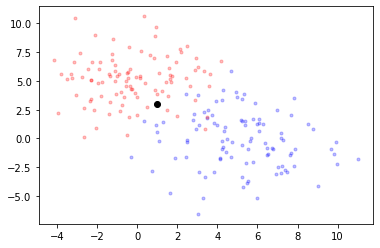

In [4]:
plt.plot(X1[:,0],X1[:,1],'b.', alpha=0.25)
plt.plot(X2[:,0],X2[:,1],'r.', alpha=0.25)
plt.plot([1],[3],'ko')
plt.show()

In [5]:
#evaluamos ambas probabilidades
x = np.array([1,3])
c = 2*np.pi*np.linalg.det(S)

num1 = -np.dot(np.transpose(x-m1),np.dot(S,(x-m1)))
p1 = 0.5*np.exp(num1)/c

num2 = -np.dot(np.transpose(x-m2),np.dot(S,(x-m2)))
p2 = 0.5*np.exp(num2)/c

print('P(Y=1 | X=[1,3]) = ' + str(p1))
print('P(Y=2 | X=[1,3]) = ' + str(p2))

P(Y=1 | X=[1,3]) = 1.6445227636162075e-57
P(Y=2 | X=[1,3]) = 4.420669830983572e-14


Alternativamente, podemos evaluar la razón entre dos probabilidades diferentes y verificar si es mayor o menor a uno:

In [6]:
p1/p2 #asignamos a clase 2 pues la razón es menor a uno
#observa que si la razón se encuentra en [0, 1) la clase es 2, 
#mientras que es uno si se encuentra en (1, oo)

3.720075976020836e-44

Otra estrategia más simétrica consiste en evaluar el logaritmo de la razón y verificar el signo:

In [7]:
#asginamos a la clase 1 si el signo es positivo, si el signo es negativo a la clase 2
np.log(p1/p2) 

-100.0

Tomando esta última, podemos comparar las probabilidades de parejas de clases tomando el logaritmo de su razón:

$$\color{blue}{\log{\frac{P(Y=l_i \;|\; X=x)}{P(Y=l_j \;|\; X=x)}} = \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j)}$$

Los puntos del espacio en los que esta expresión es cero representan las fronteras entre clases, **las cuales son lineales**.

**Ejemplo**

Para los datos que construimos más arriba, la frontera entre las dos clases está dada por la ecuación:

\begin{align}
      \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j) &=0\\
      &\\
      \log{\frac{1/2}{1/2}}-\frac{1}{2\times5}\left([5,0]+[0,5]\right)\left([5,0]-[0,5]\right)^T+x^{T}([5,0]-[0,5])^T/5 &=0
      &\\
      &\\
      \color{red}{x_1-x_2}&\color{red}{=0}
\end{align}

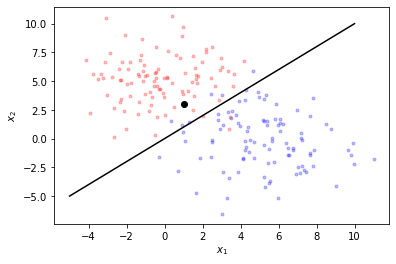

In [8]:
plt.plot(X1[:,0],X1[:,1],'b.', alpha=0.25)
plt.plot(X2[:,0],X2[:,1],'r.', alpha=0.25)
plt.plot([1],[3],'ko')
plt.plot([-5,10],[-5,10],'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Estimación de parámetros

En la práctica, los parámetros de las clases son desconocidos y deben estimarse a partir de las observaciones:

\begin{align}
    \widehat{\pi}_k &= \frac{N_k}{N}\\
    &\\
    \widehat{\mu}_k &= \frac{\sum_{i|y_i=l_k}x_i}{N_k}\\
    &\\    
    \widehat{\Sigma} &= \sum_{k=1}^{K}\sum_{i|y_i=k}(x_i-\widehat{\mu}_k)(x_i-\widehat{\mu}_k)^{T}/(N-K) 
\end{align}

## Actividad: 

<font color="red">Actividad</font>

* Explora el conjunto de datos $\texttt{lda_data.csv}$
* Aplica la técnica de **discriminantes lineales** para encontrar las fronteras entre cada pareja de clases (3 clases)

**Parcial II: Tarea II - Discriminantes Lineales (LDA) y Discriminantes Cuadráticas (QDA)     
Vanessa Martínez Romero - 160300006**

## Análisis del primer conjunto de datos
**Este primer conjunto de datos posee tres clases las cuales comparten la misma matriz de covarianza.**

In [9]:
df1 = pd.read_csv("lda_data.csv",sep= " ",index_col= None, names = ['x1','x2','clase'])
df1

,x1,x2,clase
0,1.412897,5.015043,1.0
1,7.479694,2.721120,1.0
2,1.063656,6.582988,1.0
3,8.427866,3.679405,1.0
4,4.483817,3.732147,1.0
...,...,...,...
295,-2.038027,5.492935,3.0
296,-6.168820,5.785828,3.0
297,-2.648464,6.327162,3.0
298,-2.507310,-1.730478,3.0


### Gráfica de disperesión de las clases
##### Análisis previo de los datos

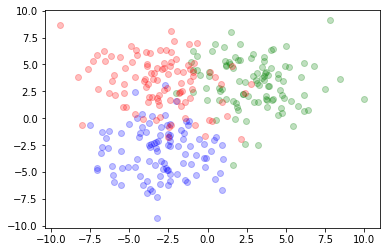

In [10]:
plt.plot(df1[df1.clase == 1].x1, df1[df1.clase == 1].x2, 'g.', alpha=0.25, markersize=12)
plt.plot(df1[df1.clase == 2].x1, df1[df1.clase == 2].x2, 'b.', alpha=0.25, markersize=12)
plt.plot(df1[df1.clase == 3].x1, df1[df1.clase == 3].x2, 'r.', alpha=0.25, markersize=12)
plt.show()

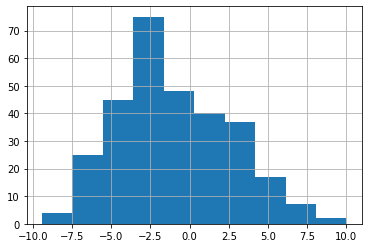

In [69]:
df1.x1.hist()
plt.show()

Analizando el histograma del primer vector de características $x1$, vemos que su distribución tiene un comportamiento similar a una distribución normal, con un sesgo ligero.

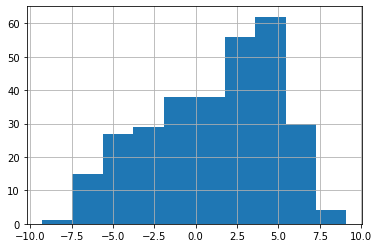

In [70]:
df1.x2.hist()
plt.show()

En cuanto al histograma del vector de características $x2$, vemos que el comportamiento de la distribución muestra un sesgo más evidente, ya que los datos se inclinan más hacia el lado derecho.

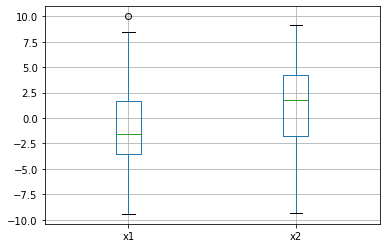

In [117]:
df1.boxplot(column=['x1', 'x2'])
plt.show()

El boxplot del primer vector de características muestra solo un dato atípico, mientras que el segundo boxplot no muestra datos atípicos para el segundo vector de características.

### Estimación de parámetros
\begin{align}
    \widehat{\pi}_k &= \frac{N_k}{N}\\
    &\\
    \widehat{\mu}_k &= \frac{\sum_{i|y_i=l_k}x_i}{N_k}\\
    &\\    
    \widehat{\Sigma} &= \sum_{k=1}^{K}\sum_{i|y_i=k}(x_i-\widehat{\mu}_k)(x_i-\widehat{\mu}_k)^{T}/(N-K) 
\end{align}

In [11]:
#Frecuencia (Pi)
#Probabilidad de la clase (probabilidad de que un elemento pertenezca a una clase)
def Fecuencia_Pi(datframe):
    pi = list()
    N = len(datframe)
    pi.append(float(len(datframe[datframe.clase == 1]))/N)
    pi.append(float(len(datframe[datframe.clase == 2]))/N)
    pi.append(float (len(datframe[datframe.clase == 3]))/N)
    return pi

Pi = Fecuencia_Pi(df1)
Pi

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [12]:
#Medias de las clases(mu)
def Medias_mu(datframe):
    nk1 = len(datframe[datframe.clase==1])
    nk2 = len(datframe[datframe.clase==2])
    nk3 = len(datframe[datframe.clase==3])


    mu = list()
    mu.append(np.mat([sum(datframe[datframe.clase == 1].x1) / nk1, sum(datframe[datframe.clase == 1].x2) / nk1]).transpose())
    mu.append(np.mat([sum(datframe[datframe.clase == 2].x1) / nk2, sum(datframe[datframe.clase == 2].x2) / nk2]).transpose())
    mu.append(np.mat([sum(datframe[datframe.clase == 3].x1) / nk3, sum(datframe[datframe.clase == 3].x2) / nk3]).transpose())
    return mu

Mu = Medias_mu(df1)
Mu

[matrix([[2.95401963],
         [3.27375169]]), matrix([[-3.02582593],
         [-3.1501613 ]]), matrix([[-3.00966552],
         [ 3.32620324]])]

In [174]:
#Matriz de covarianza (dispersión de los elementos de la clase)
def Matrix_Cov(datframe):
    N = len(datframe)
    S = 0 #sigma
    for k in set(datframe.clase):
        #print ("clases: ", k)
        for m in datframe[datframe.clase == k].itertuples():
            aux = np.mat([m.x1, m.x2]).transpose()
            S += (aux - Mu[int(k-1)])*(aux - Mu[int(k-1)]).transpose()
    S = S /(N-len(set(df1.clase)))
    return S

M_Cov = Matrix_Cov(df1)
M_Cov

matrix([[ 5.00922496, -0.71316683],
        [-0.71316683,  5.23042949]])

### Definiendo las fronteras para cada clase

Tomando esta última, podemos comparar las probabilidades de parejas de clases tomando el logaritmo de su razón:

$$\color{blue}{\log{\frac{P(Y=l_i \;|\; X=x)}{P(Y=l_j \;|\; X=x)}} = \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j)}$$

Los puntos del espacio en los que esta expresión es cero representan las fronteras entre clases, **las cuales son lineales para este caso, ya que las tres clases comparten la misma matriz de covarianza**.


Para los datos que construimos más arriba, la frontera entre las dos clases está dada por la ecuación:

\begin{align}
      \log{\frac{\pi_i}{\pi_j}}-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)+x^{T}\Sigma^{-1}(\mu_i-\mu_j) &=0\\
\end{align}

Habiendo estimado los parámetros necesarios (Pi, Mu y la matriz de covarianza) podemos evaluar la fórmula anterior de la siguiente manera:    

A = $log{\frac{\pi_i}{\pi_j}}$ ; el resultado será un valor escalar.

B = $-\frac{1}{2}(\mu_i+\mu_j)^{T}\Sigma^{-1}(\mu_i-\mu_j)$ ; el resultado será un valor escalar.

C = $x^{T}\Sigma^{-1}(\mu_i-\mu_j)$ ; el resultado será un vector.

**Nota: para la parte C, no tomaremos en cuenta la $x^T$, ya que será nuestra incógnita.**

Fórmula:

\begin{align}
    \text{A}+\text{B}+x^{T}\text{C}=0
\end{align}

>Tomando
\begin{align}
    x^{T}=[\begin{array}{cc} x_1 & x_2 \end{array}]
\end{align}
y
\begin{align}
    \text{C_1}=[\begin{array}{c} C1_1 \\ C1_2 \end{array}]\\\\
\end{align}
se obtiene:
\begin{align}
    \text{A}+\text{B}+[\begin{array}{cc} x_1 & x_2 \end{array}][\begin{array}{c} C_1 \\ C_2 \end{array}]\\\\
    \text{A}+\text{B}+C1_1x_1+C2_2x2
\end{align}


>Despejando $x_2$
\begin{align}
    x_2=\frac{\text{A}+\text{B}+C_1x_1}{-C1_2}
\end{align}

**Hallamos la frontera entre las clases 1 y 2**

In [142]:
def A(PI, k1, k2):
    return np.log(PI[k1-1] / PI[k2-1])
A(Pi,1,2)

0.0

In [154]:
def B(MU, Sigma, k1, k2):
    return - 1/2 * (MU[k1-1] + MU[k2-1]).transpose() * np.linalg.inv(Sigma) *  (MU[k1-1] - MU[k2-1])
B(Mu, M_Cov,1,2)

matrix([[-0.13836384]])

In [176]:
def C(MU, Sigma, k1, k2):
    return np.linalg.inv(Sigma)*(MU[k1-1]- MU[k2-1])
C(Mu, M_Cov, 1, 2)

matrix([[1.3957175 ],
        [1.41848627]])

In [189]:
#Función para obtener el valor de x2
def General(x1, k1 , k2):
    return ((A(Pi,k1,k2) + B(Mu, M_Cov,k1,k2) + C(Mu, M_Cov,k1,k2)[0]*x1)/-C(Mu, M_Cov,k1,k2)[1])[0,0]
x2_12 = General(2, 1, 2)
x2_12

-1.941428743206197

**Hallamos la frontera entre las clases 1 y 3**

In [178]:
A(Pi,1,3)

0.0

In [179]:
B(Mu, M_Cov,1,3)

matrix([[-0.4788016]])

In [180]:
C(Mu, M_Cov, 1, 2)

matrix([[1.3957175 ],
        [1.41848627]])

In [204]:
x2_13 = General(2,1,3)
x2_13

-12.532497089801321

**Hallamos la frontera entre las clases 2 y 3**

In [183]:
A(Pi,2,3)

0.0

In [184]:
B(Mu, M_Cov,2,3)

matrix([[-0.44125662]])

In [185]:
C(Mu, M_Cov, 2, 3)

matrix([[-0.18306448],
        [-1.2631697 ]])

In [205]:
x2_23 = General(2,2,3)
x2_23

-0.6391742719527947

### Gráfica de dispersión de las clases con las fronteras de cada una

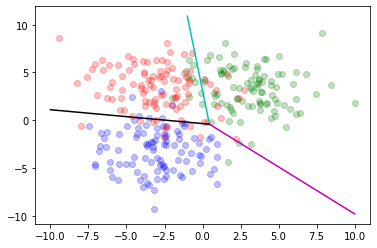

In [202]:
plt.plot(df1[df1.clase == 1].x1, df1[df1.clase == 1].x2, 'g.', alpha=0.25, markersize=12)
plt.plot(df1[df1.clase == 2].x1, df1[df1.clase == 2].x2, 'b.', alpha=0.25, markersize=12)
plt.plot(df1[df1.clase == 3].x1, df1[df1.clase == 3].x2, 'r.', alpha=0.25, markersize=12)
plt.plot([0.4,10], [General(0.4, 1 , 2), General(10, 1 , 2)], 'm')
plt.plot([-1, 0.4], [General(-1, 1 , 3), General(0.4, 1 , 3)], 'c')
plt.plot([-10, 0.4], [General(-10, 2 , 3), General(0.4, 2 , 3)], 'k')
plt.show()

## Análisis del segundo conjunto de datos
**Este conjunto de datos posee dos clases las cuales tienen una matriz de covarianza diferente.**

In [50]:
df2 = pd.read_csv("df_disc_2.csv", usecols=[1, 2, 3], names = ['x1','x2','clase'], dtype = {"x1": float, "x2": float, "clase": int}, skiprows=1)
#df2 = df2.drop(df2.index[0])
df2

,x1,x2,clase
0,6.624098,0.738611,2
1,0.851395,3.488259,1
2,5.379887,2.717840,2
3,-2.643119,6.866325,1
4,-2.328890,4.786413,1
...,...,...,...
195,5.417866,-0.944674,2
196,2.121435,5.364265,1
197,3.964237,0.779274,2
198,3.233762,-3.388377,2


### Gráfica de disperesión de las clases
##### Análisis previo de los datos

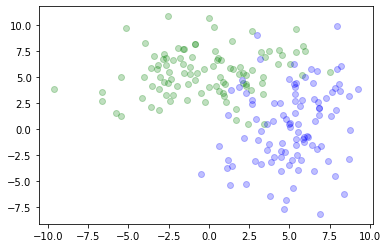

In [51]:
plt.plot(df2[df2.clase == 1].x1, df2[df2.clase == 1].x2, 'g.', alpha=0.25, markersize=12)
plt.plot(df2[df2.clase == 2].x1, df2[df2.clase == 2].x2, 'b.', alpha=0.25, markersize=12)
plt.show()

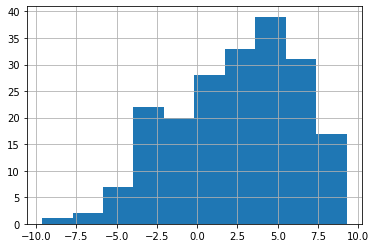

In [71]:
df2.x1.hist()
plt.show()

El histograma para el vector de características $x1$ muestra una distribución un sesgo evidente, debido a que los datos aparecen más inclinados hacia el lado derecho de la gráfica.

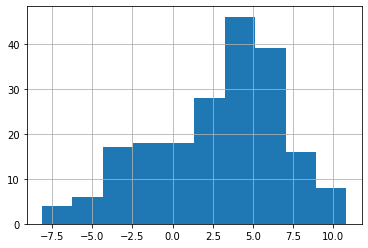

In [72]:
df2.x2.hist()
plt.show()

Para el histograma del vector $x2$, muestra una distribución que presenta un sesgo notorio, debido a que los datos tienden más hacia un lado de la gráfica en lugar de estar centrados.

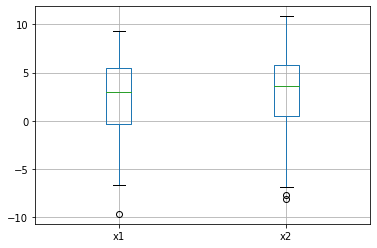

In [116]:
df2.boxplot(column=['x1', 'x2'])
plt.show()

Los boxplots para ambos vectores de características muestran que hay pocos valores atípicos presentes en ellos.

### Estimación de parámetros para el segundo conjunto de datos

\begin{align}
    \widehat{\pi}_k &= \frac{N_k}{N}\\
    &\\
    \widehat{\mu}_k &= \frac{\sum_{i|y_i=l_k}x_i}{N_k}\\
    &\\    
    \widehat{\Sigma} &= \sum_{k=1}^{K}\sum_{i|y_i=k}(x_i-\widehat{\mu}_k)(x_i-\widehat{\mu}_k)^{T}/(N-K) 
\end{align}

In [52]:
#Frecuencia (Pi)
#Probabilidad de la clase (probabilidad de que un elemento pertenezca a una clase)
def Fecuencia_Pi2(datframe):
    pi = list()
    N = len(datframe)
    pi.append(float(len(datframe[datframe.clase == 1]))/N)
    pi.append(float(len(datframe[datframe.clase == 1]))/N)
    return pi

Pi2 = Fecuencia_Pi2(df2)
Pi2

[0.5, 0.5]

In [84]:
#Medias de las clases
def Medias_mu2(datframe):
    nk1 = len(datframe[datframe.clase== 1])
    nk2 = len(datframe[datframe.clase== 2])
 
    mu = list()
    mu.append(np.mat([sum(datframe[datframe.clase == 1].x1) / nk1, sum(datframe[datframe.clase == 1].x2) / nk1]).transpose())
    mu.append(np.mat([sum(datframe[datframe.clase == 2].x1) / nk2, sum(datframe[datframe.clase == 2].x2) / nk2]).transpose())
    return mu

Mu2 = Medias_mu2(df2)
Mu2

[matrix([[-0.2163616 ],
         [ 5.39075695]]), matrix([[5.12481946],
         [0.28303641]])]

In [220]:
#Matriz de covarianza 
def Matrix_Cov2(datframe):
    s = list()
    N = len(datframe)
    for k in set(datframe.clase):
        S = 0 #sigma (valores de la matriz de covarianza)
        for m in datframe[datframe.clase == k].itertuples():
            aux = np.mat([m.x1, m.x2]).transpose()
            S += (aux - Mu2[int(k-1)])*(aux - Mu2[int(k-1)]).transpose()
        s.append(S/(len(df2[df2.clase == k])))
    return s

M_Cov2 = Matrix_Cov2(df2)
M_Cov2

[matrix([[10.22449297,  1.22678522],
         [ 1.22678522,  4.76920278]]), matrix([[ 4.40129422,  1.62339541],
         [ 1.62339541, 13.6891447 ]])]

In [221]:
#Matriz de covarianza de la primera clase
M_Cov2[0]

matrix([[10.22449297,  1.22678522],
        [ 1.22678522,  4.76920278]])

In [222]:
#Matriz de covarianza de la segunda clase 
M_Cov2[1]

matrix([[ 4.40129422,  1.62339541],
        [ 1.62339541, 13.6891447 ]])

### Definiendo las fronteras para cada clase

$ln(\frac{\pi_i|\Sigma_i|}{\pi_j|\Sigma_j|})+\frac{1}{2}[-x^T\Sigma_i^{-1}x+2x^T\Sigma_i^{-1}\mu_i-\mu_i^T\Sigma_i^{-1}\mu_i+x^T\Sigma_j^{-1}x-2x^T\Sigma_j^{-1}\mu_j+\mu_j^T\Sigma_j^{-1}\mu_j]$                   



A partir de la fórmula anterior podemos definir las fronteras para cada clase. Para esto evaluaremos la fórmula por partes.                   
**Nota:                                           
Dejaremos fuera todas las $x$ y $x^T$ ya que $x$ como tal será la incógnita.**


Divideremos la ecuación de la siguiente forma:  

$a$ = $ln(\frac{\pi_i|\Sigma_i|}{\pi_j|\Sigma_j|})$ ; el resultado es una escalar.

$b$ = [$-\Sigma_i^{-1}$]$\frac{1}{2}$ ; el resultado es una matriz. 

$c$ = [$2\Sigma_i^{-1}\mu_i$]$\frac{1}{2}$

$d$ = [$-\mu_i^T\Sigma_i^{-1}\mu_i$]$\frac{1}{2}$ ; el resultado es una escalar.

$e$ = [$\Sigma_j^{-1}$]$\frac{1}{2}$

$f$ = [$-2\Sigma_j^{-1}\mu_j$]$\frac{1}{2}$

$g$ = [$\mu_j^T\Sigma_j^{-1}\mu_j$]$\frac{1}{2}$


$ln(\frac{\pi_i|\Sigma_i|}{\pi_j|\Sigma_j|})$

In [89]:
f0 =  np.log(Pi2[0] * np.linalg.det(M_Cov2[0]) / Pi2[1] * np.linalg.det(M_Cov2[1]))
f0[0]

7.9093901247993745

[$-\Sigma_i^{-1}$]$\frac{1}{2}$

In [227]:
f1 = -(np.linalg.inv(M_Cov2[0]))*(1/2)
f1

matrix([[-0.05045955,  0.01297974],
        [ 0.01297974, -0.10817811]])

[$2\Sigma_i^{-1}\mu_i$]$\frac{1}{2}$

In [228]:
f2 = np.linalg.inv(M_Cov2[0]) * Mu2[0]
f2

matrix([[-0.16177632],
        [ 1.17194047]])

[$-\mu_i^T\Sigma_i^{-1}\mu_i$]$\frac{1}{2}$

In [217]:
f3 = ((-Mu2[0].transpose() * np.linalg.inv(M_Cov2[0]) * Mu2[0])*(1/2))[0,0]
f3

-3.176324207311043

[$\Sigma_j^{-1}$]$\frac{1}{2}$

In [229]:
f4 = (np.linalg.inv(M_Cov2[1]))*(1/2)
f4

matrix([[ 0.11879939, -0.01408842],
        [-0.01408842,  0.03819604]])

[$-2\Sigma_j^{-1}\mu_j$]$\frac{1}{2}$

In [232]:
f5 = -(np.linalg.inv(M_Cov2[1]) * Mu2[1])
f5

matrix([[-1.20967579],
        [ 0.12277945]])

[$\mu_j^T\Sigma_j^{-1}\mu_j$]$\frac{1}{2}$

In [235]:
f6 = ((Mu2[1].transpose() * np.linalg.inv(M_Cov2[1]) * Mu2[1])*(1/2))[0,0]
f6

3.0823094886512266

Una vez ya obtenidos los componentes de la fórmula para hallar la región, procedemos a unirlos de la siguiente forma: 


Ecuación resumida:  

\begin{align}
    \text{a}+x^{T}\text{b}x+x^{T}\text{c}+\text{d}+x^{T}\text{e}x+x^{T}\text{f}+\text{g}=0
\end{align}

>Tomando
\begin{align}
    x=[\begin{array}{cc} x_1 \\ x_2 \end{array}]\\\\
    x^{T}=[\begin{array}{cc} x_1 & x_2 \end{array}]\\\\
    \text{B}=[\begin{array}{cc} \text{b}{11} & \text{b}{12} \\ \text{b}{21} & \text{b}{22} \end{array}]\\\\
    \text{C}=[\begin{array}{c} \text{c}{1} \\ \text{c}{2} \end{array}]\\\\
    \text{E}=[\begin{array}{cc} \text{e}{11} & \text{e}{12} \\ \text{e}{21} & \text{e}{22} \end{array}]\\\\
    \text{F}=[\begin{array}{c} \text{f}{1} \\ \text{f}{2} \end{array}]\\\\
\end{align}


>sustituyendo y resolviendo se obtiene:
\begin{align}
    (\text{a})+
    (\text{b}_{22})x_2^2+
    (\text{b}{21}x_1+\text{b}{12}x_1)x_2+
    (\text{b}_{11}x_1^2+\text{c}_1x_1)+
    (\text{c}_2)x_2+(\text{d})+
    (\text{e}_{22})x_2^2+
    (\text{e}{21}x_1+\text{e}{12}x_1)x_2+
    (\text{e}_{11}x_1^2+\text{f}_1x_1)+
    (\text{f}_2)x_2+
    (\text{g})\\\\
    (\text{b}_{22})x_2^2+
    (\text{e}_{22})x_2^2+
    (\text{b}{21}x_1+\text{b}{12}x_1)x_2+
    (\text{e}{21}x_1+\text{e}{12}x_1)x_2+
    (\text{f}_2)x_2+
    (\text{c}_2)x_2+
    (\text{a})+
    (\text{b}_{21}x_1)+
    (\text{b}_{11}x_1^2+\text{c}_1x_1)+
    (\text{d})+
    (\text{e}_{11}x_1^2+\text{f}_1x_1)+
    (\text{g})\\\\
    (\text{b}{22}+\text{e}{22})x_2^2+
    (\text{b}{12}x_1+\text{b}{12}x_1+\text{e}{21}x_1+\text{e}{12}x_1+\text{f}_2+\text{c}_2)x_2+
    (\text{a}+\text{b}{11}x_1^2+\text{c}_1x_1+\text{d}+\text{e}{11}x_1^2+\text{f}_1x_1+\text{g})
\end{align}

>despejando en términos de $x_2$:
\begin{align}
    \text{BE_2} = [\begin{array}{cc} \text{b}{22} + \text{e}{22} \end{array}]\\\\
    \text{BE_21} = [\begin{array}{cc} \text{b}{21}\text{X}{1} + \text{b}{12}\text{X}{1} + \text{e}{21}\text{X}{1} + \text{e}{12}\text{X}{1} + \text{c}{2} + \text{f}{2}\end{array}]\\\\
    \text{AB_2} = [\begin{array}{cc} \text{a} + \text{b}{11}\text{X}^2{1} + \text{c}{1}\text{X}{1} + \text{d} + \text{e}{11}\text{X}^2{1} + \text{f}{1}\text{X}{1} + \text{g}\end{array}]\\\\
    \text{BE_2}X_2^2 + \text{BE_21}X_2 + \text{AB_2}
\end{align}

In [237]:
#BE_2 = b22 + e22
BE_2 = f1[1, 1] + f4[1, 1]
BE_2

-0.06998207675201056

In [238]:
BE_21 = lambda x1: (f1[1, 0] * x1 + f1[0, 1] * x1 + f4[1, 0] * x1 + f4[0, 1] * x1 + f2[1] + f5[1])[0, 0]
BE_21(1)

1.292502578268491

In [239]:
AB_2 = lambda x1: (f0 + f1[0, 0] * x1**2 + f2[0] * x1 + f3 + f4[0, 0] * x1**2 + f4[0] * x1 + f6)[0, 0]
AB_2(1)

7.840738313448648

>Hallando las soluciones por medio de la fórmula general:
\begin{align}
    x_2=\frac{-\text{BE_21}\pm\sqrt{\text{BE_21}^2-4(\text{BE_2})(\text{AB_2})}}{2\text{BE_2}}\\\\
\end{align}

In [246]:
#Soluciones halladas por medio de la fórmula general

sol1 = lambda x1: (-BE_21(x1) + np.sqrt(BE_21(x1)**2 - 4 * BE_2 * AB_2(x1))) / 2 * BE_2
sol2 = lambda x1: (-BE_21(x1) - np.sqrt(BE_21(x1)**2 - 4 * BE_2 * AB_2(x1))) / 2 * BE_2

### Gráfica de dispersión de las clases con las fronteras de cada una
Las lineas que aparacen en la gráfica de dispersión representan ambas soluciones:       
1. La línea roja representa la solución positiva.
2. La línea cyan representa la solución negativa.

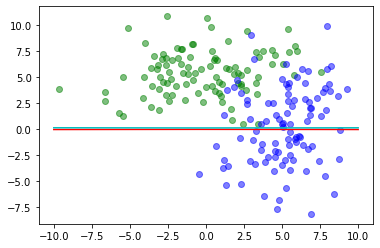

In [248]:
plt.plot(df2[df2.clase == 1].x1, df2[df2.clase == 1].x2, 'g.', alpha=0.50, markersize=12)
plt.plot(df2[df2.clase == 2].x1, df2[df2.clase == 2].x2, 'b.', alpha=0.50, markersize=12)
plt.plot(np.linspace(-10, 10, 10000), list(map(sol1, np.linspace(-10, 10, 10000))), 'r')
plt.plot(np.linspace(-10, 10, 10000), list(map(sol2, np.linspace(-10, 10, 10000))), 'c')
plt.show()